In [1]:
import numpy as np, matplotlib.pyplot as plt, pandas as pd, seaborn as sns

import sys
sys.path.append('/ahg/regevdata/projects/CRISPR-libraries/prj2/evolution/orthorep/src/')
import _config

sys.path.append('/home/unix/maxwshen/')
from mylib import util

notebook_nm = 'fig_plot_full_trajectories_orthorep'
results_dir = _config.RESULTS_PLACE + f'{notebook_nm}/'
util.ensure_dir_exists(results_dir)

Using data folder:
 /ahg/regevdata/projects/CRISPR-libraries/prj2/evolution/orthorep/data/


In [2]:
fig_nm_to_model_and_iter = {
    '3c': (7, 1840),
    '3d': (8, 870),
    's5a': (9, 670),
}

In [25]:
def load_data(fig_nm):
    print(fig_nm)
    
    model_nm, model_iter = fig_nm_to_model_and_iter[fig_nm]
    
    model_dir = '/ahg/regevdata/projects/CRISPR-libraries/prj2/evolution/orthorep/out/_fitness_from_reads_pt/'
    df = pd.read_csv(f'{model_dir}/model_{model_nm}/genotype_matrix_{model_iter}.csv', index_col = 0)
    df['Abbrev genotype'] = df.index
    
    df['Abbrev genotype'] = [s.replace('_', '.') for s in df['Abbrev genotype']]

    df.to_csv(results_dir + f'{fig_nm}.csv')
    
    dfm = df.melt(id_vars = 'Abbrev genotype', var_name = 'Passage', value_name = 'Frequency')
    dfm.head()
    dfm['Passage'] = dfm['Passage'].astype(int)
    dfm['Frequency'] *= 100
    
    return dfm

In [18]:
def plot(dfm):
    #
    import matplotlib
    matplotlib.rc('font', family = 'Arial', size = 15)
    matplotlib.rcParams['mathtext.fontset'] = 'custom'
    matplotlib.rcParams['mathtext.it'] = 'Arial:italic'
    #

    gts = sorted(list(set(dfm['Abbrev genotype'])))
    colors = sns.husl_palette(n_colors = int(len(gts) * 1.1), s = 1.0, l = 0.7)
    palette = {gt: color for gt, color in zip(gts, colors)}
    
    #
    
    fig, ax = plt.subplots(figsize = (7, 5))

    sns.lineplot(
        x = 'Passage',
        y = 'Frequency',
        hue = 'Abbrev genotype',
        palette = palette,
        data = dfm,
        linewidth = 2,
#         marker = 'o',
#         markersize = 7,
        ax = ax,
    )
    ax.get_legend().remove()
    plt.grid(alpha = 0.2)

    plt.xlabel('Passage')
    plt.ylabel('Predicted fraction of sequenced reads (%)')
    plt.xticks(np.arange(0, 13 + 1))
    # plt.xlim([0, 13.1])
    # plt.ylim([0, 102])

    plt.tight_layout()

    ##

    sns.despine(trim = True)
    ax.tick_params(length = 4.5, color = 'black', width = 1.5)
    for axis in ['bottom', 'left']:
        ax.spines[axis].set_linewidth(1.5)
        ax.spines[axis].set_color('black')

    matplotlib.rcParams['pdf.fonttype'] = 42
    matplotlib.rcParams['ps.fonttype'] = 42

    out_fn = results_dir + f'{fig_nm}.pdf'
    print(f'Saving to {out_fn} ...')
    plt.savefig(out_fn, transparent = True, bbox_inches = 'tight')

    plt.show()
    plt.close()
    ##

    '''
        Save legend figure separately
        https://stackoverflow.com/questions/4534480/get-legend-as-a-separate-picture-in-matplotlib
    '''
    fig_leg = plt.figure(figsize = (3, 3))
    ax_leg = fig_leg.add_subplot(111)

    # add the legend from the previous axes
    ax_leg.legend(
        *ax.get_legend_handles_labels(), 
        loc = 'center',
        handler_map = {}
    )

    # hide the axes frame and the x/y labels
    ax_leg.axis('off')

    matplotlib.rcParams['pdf.fonttype'] = 42
    matplotlib.rcParams['ps.fonttype'] = 42
    fig_leg.savefig(results_dir + f'{fig_nm}_legend.pdf', transparent = True, bbox_inches = 'tight')

    plt.show()
    plt.close()
    ##
    
    return

## 3c

3c
Saving to /ahg/regevdata/projects/CRISPR-libraries/prj2/evolution/orthorep/results/fig_plot_full_trajectories_orthorep/3c.pdf ...


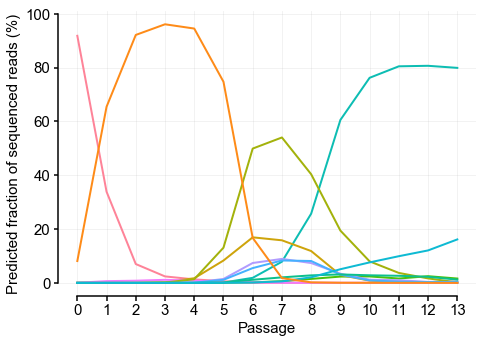

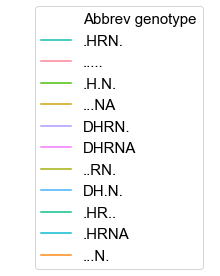

In [26]:
fig_nm = '3c'

dfm = load_data(fig_nm)
plot(dfm)

## 3d

3d
Saving to /ahg/regevdata/projects/CRISPR-libraries/prj2/evolution/orthorep/results/fig_plot_full_trajectories_orthorep/3d.pdf ...


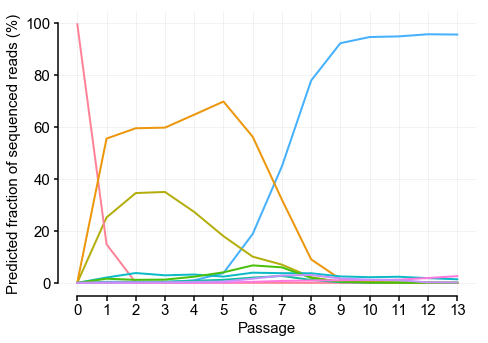

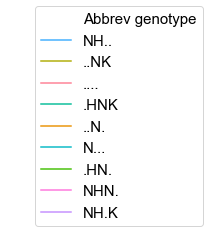

In [27]:
fig_nm = '3d'

dfm = load_data(fig_nm)
plot(dfm)

## s5a

s5a
Saving to /ahg/regevdata/projects/CRISPR-libraries/prj2/evolution/orthorep/results/fig_plot_full_trajectories_orthorep/s5a.pdf ...


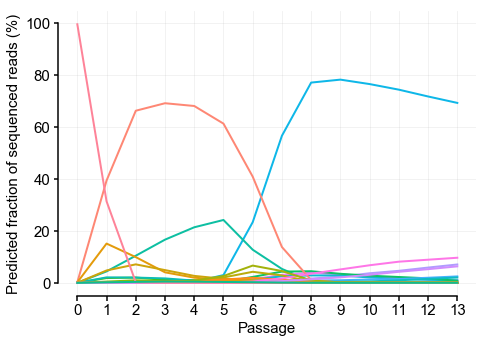

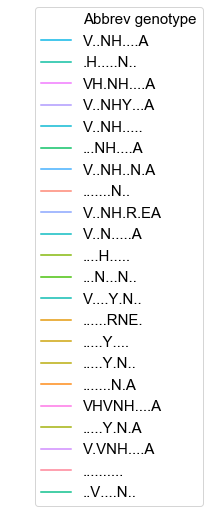

In [28]:
fig_nm = 's5a'

dfm = load_data(fig_nm)
plot(dfm)